In [170]:
import nltk
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import gensim
from gensim.utils import simple_preprocess

In [133]:
#ZAD1

with open("anna_karenina.txt", "r", encoding="utf-8") as f:
    anna_text = f.read().split("\n\n")

with open("jane_eyre.txt", "r", encoding="utf-8") as f:
    jane_text = f.read().split("\n\n")

In [134]:
selected_anna = anna_text[:5]
selected_jane = jane_text[:5]

In [135]:
def clean_text(text):
    text = re.sub(r"\s+", " ", text)
    return " ".join(simple_preprocess(text))

In [136]:
cleaned_anna = [clean_text(ch) for ch in selected_anna]
cleaned_jane = [clean_text(ch) for ch in selected_jane]

In [137]:
full_text = cleaned_anna + cleaned_jane

In [138]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(full_text)

In [139]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [140]:
text_labels = [f"Anna {i+1}" for i in range(len(cleaned_anna))] + [f"Jane {i+1}" for i in range(len(cleaned_jane))]
df_sim = pd.DataFrame(cosine_sim, index=text_labels, columns=text_labels)
df_sim

,Anna 1,Anna 2,Anna 3,Anna 4,Anna 5,Jane 1,Jane 2,Jane 3,Jane 4,Jane 5
Anna 1,1.000000,0.074066,0.000000,0.0,0.068700,0.987716,0.000000,0.000000,0.0,0.089626
Anna 2,0.074066,1.000000,0.000000,0.0,0.000000,0.000000,0.258199,0.000000,0.0,0.000000
Anna 3,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.226991,0.0,0.000000
Anna 4,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Anna 5,0.068700,0.000000,0.000000,0.0,1.000000,0.068419,0.000000,0.000000,0.0,0.679968
Jane 1,0.987716,0.000000,0.000000,0.0,0.068419,1.000000,0.114274,0.000000,0.0,0.089260
Jane 2,0.000000,0.258199,0.000000,0.0,0.000000,0.114274,1.000000,0.000000,0.0,0.000000
Jane 3,0.000000,0.000000,0.226991,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
Jane 4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
Jane 5,0.089626,0.000000,0.000000,0.0,0.679968,0.089260,0.000000,0.000000,0.0,1.000000


In [141]:
tokenized_text = [ch.split() for ch in full_text]

word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=2, sg=1)

In [142]:
def get_avg_vector(text, model):
    words = [word for word in text.split() if word in model.wv]
    if words:
        return np.mean([model.wv[word] for word in words], axis=0)
    else:
        return np.zeros(model.vector_size)

In [143]:
text_vectors = np.array([get_avg_vector(ch, word2vec_model) for ch in full_text])

In [144]:
word2vec_sim = cosine_similarity(text_vectors)

In [145]:
df_w2v_sim = pd.DataFrame(word2vec_sim, index=text_labels, columns=text_labels)
df_w2v_sim

,Anna 1,Anna 2,Anna 3,Anna 4,Anna 5,Jane 1,Jane 2,Jane 3,Jane 4,Jane 5
Anna 1,1.000000,0.062244,0.044606,0.0,0.185660,0.995398,-0.044270,0.044606,0.0,0.242770
Anna 2,0.062244,1.000000,-0.142769,0.0,0.041876,0.017498,0.317190,-0.142769,0.0,0.010890
Anna 3,0.044606,-0.142769,1.000000,0.0,0.025968,0.035114,-0.224746,1.000000,0.0,0.055654
Anna 4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Anna 5,0.185660,0.041876,0.025968,0.0,1.000000,0.178223,-0.056800,0.025968,0.0,0.943800
Jane 1,0.995398,0.017498,0.035114,0.0,0.178223,1.000000,0.021930,0.035114,0.0,0.238032
Jane 2,-0.044270,0.317190,-0.224746,0.0,-0.056800,0.021930,1.000000,-0.224746,0.0,-0.054589
Jane 3,0.044606,-0.142769,1.000000,0.0,0.025968,0.035114,-0.224746,1.000000,0.0,0.055654
Jane 4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Jane 5,0.242770,0.010890,0.055654,0.0,0.943800,0.238032,-0.054589,0.055654,0.0,1.000000


In [146]:
def find_most_similar(df_sim):
    np.fill_diagonal(df_sim.values, 0)
    max_index = np.unravel_index(np.argmax(df_sim.values), df_sim.shape)
    return df_sim.index[max_index[0]], df_sim.columns[max_index[1]], df_sim.values[max_index]

In [147]:
most_similar_tfidf = find_most_similar(df_sim)
most_similar_w2v = find_most_similar(df_w2v_sim)

In [148]:
print(f"Najbardziej podobne rozdziały wg TF-IDF: {most_similar_tfidf}")
print(f"Najbardziej podobne rozdziały wg Word2Vec: {most_similar_w2v}")

Najbardziej podobne rozdziały wg TF-IDF: ('Anna 1', 'Jane 1', 0.9877157699855494)
Najbardziej podobne rozdziały wg Word2Vec: ('Anna 3', 'Jane 3', 0.9999999999999998)


In [149]:
#ZAD2

with open("anna_karenina.txt", "r", encoding="utf-8") as f:
    anna_text = f.read()

with open("jane_eyre.txt", "r", encoding="utf-8") as f:
    jane_text = f.read()

In [150]:
def clean_text(text):
    text = re.sub(r"\s+", " ", text)
    return simple_preprocess(text)

In [151]:
cleaned_anna = clean_text(anna_text)
cleaned_jane = clean_text(jane_text)

In [152]:
model_anna = Word2Vec(sentences=[cleaned_anna], vector_size=100, window=5, min_count=5, sg=1)
model_jane = Word2Vec(sentences=[cleaned_jane], vector_size=100, window=5, min_count=5, sg=1)

In [153]:
model_anna.save("word2vec_anna.model")
model_jane.save("word2vec_jane.model")

In [154]:
words_to_compare = ["love", "marriage", "family"]

In [155]:
def get_similar_words(word, model, topn=5):
    if word in model.wv:
        return model.wv.most_similar(word, topn=topn)
    else:
        return f"Słowo '{word}' nie występuje w modelu"

In [156]:
for word in words_to_compare:
    print(f"\nPodobne słowa dla '{word}' w Anna Karenina:")
    print(get_similar_words(word, model_anna))

    print(f"\nPodobne słowa dla '{word}' w Jane Eyre:")
    print(get_similar_words(word, model_jane))


Podobne słowa dla 'love' w Anna Karenina:
[('kitty', 0.9991228580474854), ('for', 0.999039351940155), ('house', 0.9990317821502686), ('tatar', 0.9990177750587463), ('skate', 0.9990174770355225)]

Podobne słowa dla 'love' w Jane Eyre:
[('over', 0.9988188147544861), ('hands', 0.9988125562667847), ('his', 0.9987941980361938), ('think', 0.9987667798995972), ('quite', 0.9987666010856628)]

Podobne słowa dla 'marriage' w Anna Karenina:
[('tatar', 0.9963883757591248), ('often', 0.9963667392730713), ('been', 0.996293842792511), ('these', 0.9962807893753052), ('nothing', 0.9962449669837952)]

Podobne słowa dla 'marriage' w Jane Eyre:
[('union', 0.313661128282547), ('imagined', 0.31209319829940796), ('reasons', 0.29198187589645386), ('concern', 0.28638988733291626), ('career', 0.27692997455596924)]

Podobne słowa dla 'family' w Anna Karenina:
[('some', 0.9990033507347107), ('about', 0.9989868402481079), ('while', 0.9988959431648254), ('hands', 0.9988829493522644), ('children', 0.998859226703643

In [157]:
def cosine_similarity_between_words(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        vec1 = model.wv[word1].reshape(1, -1)
        vec2 = model.wv[word2].reshape(1, -1)
        return cosine_similarity(vec1, vec2)[0][0]
    else:
        return None

In [159]:
word_pairs = [("love", "marriage"), ("love", "family"), ("marriage", "family")]

In [160]:
for pair in word_pairs:
    anna_sim = cosine_similarity_between_words(pair[0], pair[1], model_anna)
    jane_sim = cosine_similarity_between_words(pair[0], pair[1], model_jane)
    
    print(f"\nPodobieństwo '{pair[0]}' ↔ '{pair[1]}'")
    print(f"Anna Karenina: {anna_sim:.4f}" if anna_sim is not None else "Brak w modelu")
    print(f"Jane Eyre: {jane_sim:.4f}" if jane_sim is not None else "Brak w modelu")


Podobieństwo 'love' ↔ 'marriage'
Anna Karenina: 0.9955
Jane Eyre: 0.1930

Podobieństwo 'love' ↔ 'family'
Anna Karenina: 0.9986
Jane Eyre: 0.9968

Podobieństwo 'marriage' ↔ 'family'
Anna Karenina: 0.9959
Jane Eyre: 0.2057


In [163]:
def get_vectors(words, model):
    return np.array([model.wv[word] for word in words if word in model.wv])

In [164]:
words = ["love", "marriage", "family"]
vectors_anna = get_vectors(words, model_anna)
vectors_jane = get_vectors(words, model_jane)

In [165]:
pca = PCA(n_components=2)
vectors_anna_2d = pca.fit_transform(vectors_anna)
vectors_jane_2d = pca.fit_transform(vectors_jane)

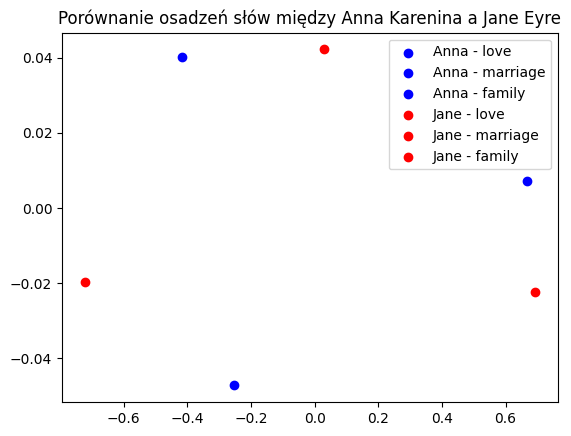

In [169]:
for i, word in enumerate(words):
    plt.scatter(vectors_anna_2d[i, 0], vectors_anna_2d[i, 1], label=f"Anna - {word}", color="blue")

for i, word in enumerate(words):
    plt.scatter(vectors_jane_2d[i, 0], vectors_jane_2d[i, 1], label=f"Jane - {word}", color="red")

plt.legend()
plt.title("Porównanie osadzeń słów między Anna Karenina a Jane Eyre")
plt.show()

In [182]:
#ZAD3

comments_df = pd.read_csv("sample.csv")

In [183]:
df = comments_df[['comment_text', 'severe_toxicity']].dropna()

In [184]:
df['severe_toxicity'] = (df['severe_toxicity'] > 0).astype(int)

In [185]:
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [186]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [189]:
df["cleaned_text"] = df["comment_text"].apply(preprocess_text)

In [190]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_text"])
y = df["severe_toxicity"]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)

In [192]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [193]:
y_pred = model.predict(X_test)
print("Dokładność modelu:", accuracy_score(y_test, y_pred))
print("Raport klasyfikacji:")
print(classification_report(y_test, y_pred))

Dokładność modelu: 0.9465
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1893
           1       0.00      0.00      0.00       107

    accuracy                           0.95      2000
   macro avg       0.47      0.50      0.49      2000
weighted avg       0.90      0.95      0.92      2000



c:\Users\KamilSarzyniak\anaconda3\envs\AI_DL_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KamilSarzyniak\anaconda3\envs\AI_DL_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KamilSarzyniak\anaconda3\envs\AI_DL_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [194]:
#ZAD4

comments_df = pd.read_csv("sample.csv")

In [195]:
df = comments_df[['comment_text', 'severe_toxicity']].dropna()

In [196]:
df['severe_toxicity'] = (df['severe_toxicity'] > 0).astype(int)

In [197]:
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KamilSarzyniak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [198]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    tokens = simple_preprocess(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

In [199]:
df["tokenized_text"] = df["comment_text"].apply(preprocess_text)

In [200]:
toxic_comments = df[df["severe_toxicity"] == 1]["tokenized_text"]
non_toxic_comments = df[df["severe_toxicity"] == 0]["tokenized_text"]

In [201]:
model_toxic = Word2Vec(sentences=toxic_comments, vector_size=50, window=5, min_count=2, sg=1)
model_non_toxic = Word2Vec(sentences=non_toxic_comments, vector_size=50, window=5, min_count=2, sg=1)

In [202]:
toxic_keywords = ["hate", "violence", "attack", "abuse", "insult"]
print("Najbardziej toksyczne słowa i ich podobne:")
for word in toxic_keywords:
    if word in model_toxic.wv:
        print(f"{word}: {model_toxic.wv.most_similar(word, topn=5)}")

Najbardziej toksyczne słowa i ich podobne:
hate: [('people', 0.9980100989341736), ('trump', 0.9976558685302734), ('child', 0.9975619316101074), ('even', 0.9975334405899048), ('another', 0.9975128769874573)]
violence: [('catholic', 0.9967122673988342), ('many', 0.996432900428772), ('going', 0.9962924718856812), ('racist', 0.9962148666381836), ('much', 0.9961422681808472)]
attack: [('country', 0.9945620894432068), ('want', 0.9941326379776001), ('problem', 0.9939144253730774), ('public', 0.9938948154449463), ('life', 0.9938805103302002)]
abuse: [('wife', 0.9595466256141663), ('lack', 0.9595287442207336), ('election', 0.9593464136123657), ('civil', 0.959006130695343), ('promised', 0.9581210613250732)]
insult: [('still', 0.9655505418777466), ('impeach', 0.9650931358337402), ('institution', 0.9645296931266785), ('mcguinty', 0.9645049571990967), ('community', 0.9638662338256836)]


In [203]:
print("\nNajbardziej nietoksyczne słowa i ich podobne:")
for word in toxic_keywords:
    if word in model_non_toxic.wv:
        print(f"{word}: {model_non_toxic.wv.most_similar(word, topn=5)}")


Najbardziej nietoksyczne słowa i ich podobne:
hate: [('stand', 0.9588407278060913), ('opposite', 0.94523686170578), ('message', 0.9428714513778687), ('call', 0.9427398443222046), ('bother', 0.9385369420051575)]
violence: [('christian', 0.9509575963020325), ('jew', 0.94728684425354), ('fear', 0.9454582929611206), ('hatred', 0.944386899471283), ('nazi', 0.9426635503768921)]
attack: [('editor', 0.9436927437782288), ('syria', 0.9419196248054504), ('ii', 0.9410156011581421), ('king', 0.9398965239524841), ('lee', 0.9384739995002747)]
abuse: [('physical', 0.9628340005874634), ('understanding', 0.9440479278564453), ('institutional', 0.9436091780662537), ('sex', 0.9427613019943237), ('adult', 0.9399478435516357)]
insult: [('allegation', 0.994317889213562), ('pretend', 0.9942560791969299), ('embarrassing', 0.9940489530563354), ('interpret', 0.9937889575958252), ('remark', 0.99374920129776)]
